## 통계분석

### 통계적 가설 검정  
- 모집단의 실제값이 얼마다 라는 주장에 대해 세운 가설이 통계적으로 유의한지 알아보는 것 
- 즉, 증명된 바 없는 주장이나 가설을 표본 통계량에 기반하여 진위 여부를 증명하는 통계적 추론 방식  
- 모집단의 모수를 추정하는 과정에서 수행  
- 예   
    - 하나의 표본 평균으로 모집단의 평균을 추정하는 과정에서 수행  
    - 두 개의 표본집단으로 두 모집단의 평균을 비교하는 과정에서 수행  

### 통계적 가설 검정 방식
- 주장하는가설과 반대되는 가설을 세우고
- 이 가설이 잘못됐다는 것을 보여줌으로써 
- 주장하는 가설이 참임을 증명하는 방식
- 대립가설(H1) : 주장하는가설 (Alternative Hypothesis)
- 귀무가설(H0) : 반대되는 가설 (Null Hypothesis)
    - 새롭게 주장하는가설이 타당하지 않을 경우
    - 현재 믿어지고 있는 가설로 돌아가게 된다는 의미  

### 가설이 채택되는 과정
- 유의수준 : 귀무가설을 기각하는 기준  
- 유의수준 기준 : 일반적으로 0.05  
- 귀무가설 기각   
    - p-value 값이 유의수준보다 작으면 귀무가설 기각  
    - 이때 대립가설이 유의하다고 함  

### p-value
- 데이터로부터 관측된 유의확률을 나타내는 값
- 수립한 대립가설의 채택 유무를 판단하는 기준으로 사용 
- 유의확률 : 검정통계량 값이 기각역 내에 나타날 수 있는 확률
- p-value 값만 보고 귀무가설을 기각할 것인지 채택할 것인지 바로 알 수 있음


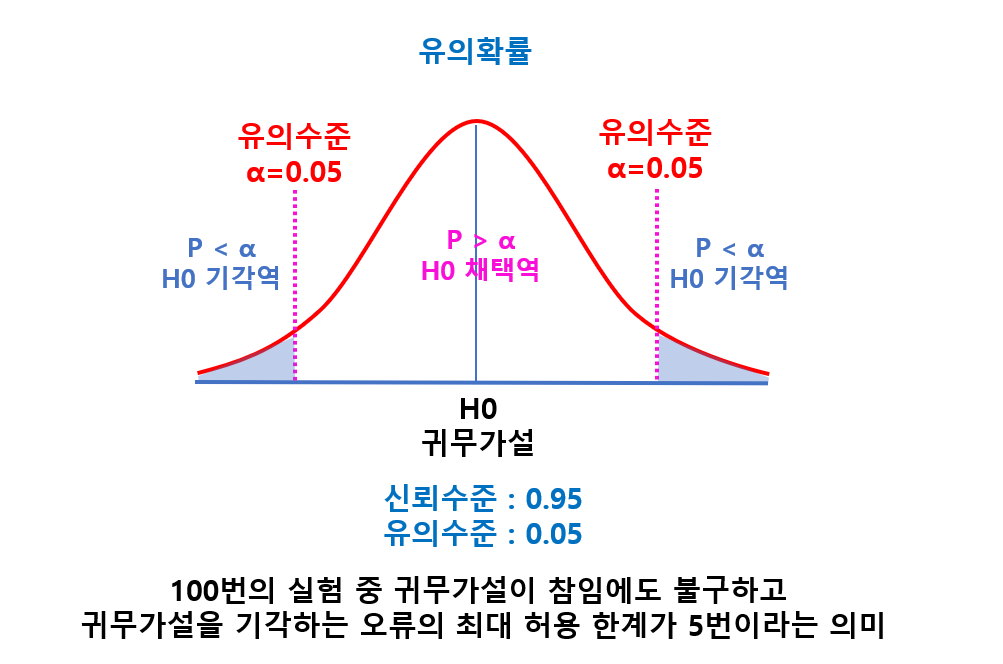

In [ ]:
##########################################################################################

## t-test (t 검정)
- 검정통계량이 귀무가설 하에서 t-분포를 따르는 통계적 가설 검정 방법
- 어느 특정 집단의 평균 값을 추정하거나 차이를 검정할 때 사용 
- 종속변수 : 평균값을 가질 수 있는 연속형 변수
- 독립변수 : 범주형 변수 

### 통계적 검정 개념 예
- A 집단과 B 집단에서 표폰을 추출하고, 몸무게의 평균 차이를 비교 했을 때
- 2Kg의 차이가 났다면
- 이 몸무게의 차이는 두 집단의 몸무게가 차이가 난다고 할 수 있을까?

---
- 통계적 분석에서 2Kg의 차이가 나타났더라도
- 분산에 따라 이 차이는 유의할 수도, 유의하지 않을 수도 있다고 봄
- 이처럼 분산을 사용하여 이 차이를 통계적으로 표현한 것을 t 검정통계량(t-test)이라고 함 
- 분석 환경에 따라 t-test 계산 공식 다름



### 대표적인 t-test 분석방법 3가지  
- 단일표본 t-test  (One Sample t-test) 
- 대응표본 t-test (Pared Sample t-test)
- 독립표본 t-test (Independent Sample t-test)


### 비모수 검정 방법
- 데이터가 특정한 분포를 따르지 않는 경우 수행하는 검정 방법
- 즉, 정규분포를 따르지 않는 경우 수행
- 단일표본 t-test 인 경우 : wilcoxon(data - mu) 사용
- 대응표본 t-test 인 경우 : wilcoxon(before, after) 사용
- 독립표본 t-test 인 경우 : ranksums(a, b) 또는 mannwhitneyu(a, b) 사용  

In [ ]:
##########################################################################################

### 단일표본 t-test (One Sample t-test)
- 단일 모집단에서 연속형 변수의 평균값을 특정 기준값과 비교
- 가정 :모집단의 구성요소들이 정규분포를 이룬다는  가정  
    - 종속변수 : 연속형  
    - 검증하고자 하는 기준값이 있어야 함  
---
- 단계
    - 가설수립
        - 귀무가설(H0) : 모평균의 값은 ~**이다**  (같다(차이가 없다))  
        - 대립가설(H1) : 모평균의 값은 ~이 **아니다**  (같지 않다(차이가 있다))
    - 유의수준 설정 : 기본적으로 0.05 
    - 검정통계량의 값과 p-value(유의 확률) 계산
    - 귀무가설의 기각여부 판단 및 해석

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### 파이썬을 활용한 단일표본 t-test  예제1  
- 성인 여성 평균 키 데이터 사용 
- 검증 수치 : 163
- 가설 설립    
    - 귀무가설(H0) : 성인 여성 평균 키가 163 cm이다  
    - 대립가설(H1) : 성인 여성 평균 키가 163 cm가 아니다  
- 유의 수준 0.05
- t-test 수행 과정
  - (1) 정규성 검정 : scipy.stats.shapiro() 사용
  - (2) t-test 진행 
    - 정규성을 따르는 경우 : stats.ttest_1samp() 사용
    - 정규성을 따르지 않는 경우 : wilcoxon test로 t-test 진행 

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('./data/성인여성_키_데이터.txt')
data.head()

height
0  150.27
1  142.94
2  160.99
3  157.48
4  153.46

In [6]:
# (1) 정규성 검정 수행 
# 귀무가설(H0) : 데이터가 정규분포를 따른다
# 대립가설(H1) : 데이터가 정규분포를 따르지 않는다 

from scipy.stats import shapiro
shapiro(data['height'])

# p-value = 0.3007 > 0.05
# 신뢰도 30.07%로 정규분포
# 귀무가설 채택

ShapiroResult(statistic=0.9535377025604248, pvalue=0.30076611042022705)

In [7]:
# (2) 단일 표본 t-test 수행 
# 검증 수치 : 163
# 귀무가설(H0) : 성인 여성 평균 키가 163 cm이다
# 대립가설(H1) : 성인 여성 평균 키가 163 cm가 아니다

from scipy.stats import ttest_1samp
ttest_1samp(data['height'], 163)

# p-value = 0.0065 < 0.05
# 신뢰도 0.65%로 평균이 163
# 귀무가설 기각

TtestResult(statistic=-2.977525529720421, pvalue=0.0065457132975827005, df=24)

### 파이썬을 활용한 단일표본 t-test 예제2
- cats 데이터 사용 
  - Bwt : 몸무게  
  - Hwt : 길이  
- 고양이들의  평균 몸무게갸 2.6Kg인지 아닌지 통계적 검정 수행하고 결과 해석
- 가설 설립    
    - 귀무가설(H0) : 고양이의 평균 몸무게는 2.6Kg이다  
    - 대립가설(H1) : 고양이의 평균 몸무게는 2.6Kg이 아니다  
- 유의 수준 0.05
- t-test 수행 과정
  - (1) 정규성 검정 : scipy.stats.shapiro() 사용
  - (2) t-test 진행 
    - 정규성을 따르는 경우 : stats.ttest_1samp() 사용
    - 정규성을 따르지 않는 경우 : wilcoxon test로 t-test 진행 : stats.wilcoxon() 사용 

In [8]:
cats = pd.read_csv('./data/cats.csv')
cats

Sex  Bwt   Hwt
0     F  2.0   7.0
1     F  2.0   7.4
2     F  2.0   9.5
3     F  2.1   7.2
4     F  2.1   7.3
..   ..  ...   ...
139   M  3.7  11.0
140   M  3.8  14.8
141   M  3.8  16.8
142   M  3.9  14.4
143   M  3.9  20.5

[144 rows x 3 columns]

In [9]:
# (1) 정규성 검정 수행 
# 고양이 몸무게 값으로 shapiro test를통해 정규성 검정
# 귀무가설(H0) : 데이터가 정규분포를 따른다
# 대립가설(H1) : 데이터가 정규분포를 따르지 않는다  

shapiro(cats['Bwt'])

# p-value = 0.00006 < 0.05
# 신뢰도 0.006%로 정규분포를 따름
# 귀무가설 기각

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730254972353578e-05)

In [10]:
# (2) wilcoxon test로 t-test 진행

from scipy.stats import wilcoxon

mu = 2.6
wilcoxon(cats['Bwt'] - mu)

# p-value = 0.0252 < 0.05
# 신뢰도 2.52%로 평균값이 mu에 따른다
# 귀무가설 기각

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [ ]:
#################################################################################################

### 대응표본 t-test (Pared Sample t-test)
- 쌍체 표본 t-test (t 검정) 
- 단일 모집단에 대해 어떠한 처리를 가했을 때 (변화를 주었을 때) 
  - 처리 전후에 따른 평균의 차이를 비교할 때 사용(효과가 있었는지 확인)
  - 예 
      - 수명영양제를 복용했을 때 복용전과 후의 차이 (수면영양제가 효과가 있었는지)
      - 보충수업을 했을 때 보충수업 전과 후의 차이 (보충수업을 했을 때 효과가 있었는지)  
- 표본 내에 개체들에 대해 두 번의 측정 수행 (같은 집단이므로 등분산성 만족)
- 가정 :처리 전후 데이터의 차이(difference)가 정규성을 만족해야 한다 
- 가설 수립
  - 귀무가설(H0) : 두 모평균 사이의 차이는 없다. (같다)  
  - 대립가설(H1) : 두 모평균 사이의 차이가 있다. (같지 않다)    
- 유의수준 설정 : 기본적으로 0.05  
- 검정통계량 및 p-value 계산  
- stats.ttest_rel()로 t-test 진행  

### 대응표본 t-test 예제1
- 10명의 환자를 대상으로 수면영양제 복용 전과 후의 수면시간을 측정하고
- 영양제의 효과가 있는지 판단  
- t-test 수행 과정
    - (1) 정규성 검정 수행 : scipy.stats.shapiro() 사용
        - 귀무가설(H0) : 데이터가 정규분포를 따른다
        - 대립가설(H1) : 데이터가 정규분포를 따르지 않는다 
        - 정규성 확인 : 전후 데이터 차이에 대해 정규성 확인 
            - shapiro(data.diff) 사용 
        - 정규성을 따르는 경우 : stats.ttest_rel() 사용
        - 정규성을 따르지 않는 경우 : wilcoxon test로 t-test 진행. stats.wilcoxon() 사용  
    - (2) 대응표본 t-test 수행  
        - 귀무가설(H0) : 수면제 복용 전과 후의 수면시간 차이는 없다. (같다)  
        - 대립가설(H1) : 수면제 복용 전과 후의 수면시간 차이는 있다. (같지 않다)  


In [11]:
# 데이터 불러오기 및 확인 
import pandas as pd 

# 수면시간
hours = {
           'before': [7, 3, 4 ,5 ,2, 1, 6, 6, 5, 4],
           'after':  [8, 4, 5, 6, 2, 3, 6, 8, 6, 5]
        }

data = pd.DataFrame(hours)
data


before  after
0       7      8
1       3      4
2       4      5
3       5      6
4       2      2
5       1      3
6       6      6
7       6      8
8       5      6
9       4      5

In [12]:
# (1) 정규성 검정 수행 
# 귀무가설(H0) : 데이터가 정규분포를 따른다
# 대립가설(H1) : 데이터가 정규분포를 따르지 않는다 

data['diff'] = data['after'] - data['before']
shapiro(data['diff'])

# p-value = 0.0219 < 0.05
# 신뢰도 2.19%로 정규분포를 따른다
# 귀무가설 기각

ShapiroResult(statistic=0.8148399591445923, pvalue=0.021947935223579407)

In [13]:
# (2) 대응표본 t-test 수행
# 귀무가설(H0) : 수면제 복용 전과 후의 수면시간 차이는 없다. (같다)
# 대립가설(H1) : 수면제 복용 전과 후의 수면시간 차이는 있다. (같지 않다)

from scipy.stats import ttest_rel
wilcoxon(data['before'], data['after'])

# p-value = 0.00829 < 0.05
# 신뢰도 0.829%로 수면시간에 차이가 없다
# 귀무가설 기각

/Users/jangseungheon/anaconda3/envs/deepEnv/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/jangseungheon/anaconda3/envs/deepEnv/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=0.0, pvalue=0.00829921599528076)

### 대응표본 t-test 예제2
- 다이어트 약의 효과가 있었는지 다이어트전, 후 비교 
- 사용 데이터 : 다이어트약_효과검증.csv

- (1) 정규성 검정 수행 : scipy.stats.shapiro() 사용
    - 귀무가설(H0) : 데이터가 정규분포를 따른다
    - 대립가설(H1) : 데이터가 정규분포를 따르지 않는다
    - 정규성을 따르는 경우 : stats.ttest_rel() 사용
    - 정규성을 따르지 않는 경우 : wilcoxon test로 t-test 진행. stats.wilcoxon() 사용 
        - stats.wilcoxon() : 대응표본 t검정에 사용하는 비모수적 검정 방법  
- (2) 대응표본 t-test 수행
    - 귀무가설(H0) : 다이어트약 복용 전과 후의 몸무게의 차이는 없다. (같다)
    - 대립가설(H1) : 다이어트약 복용 전과 후의 몸무게의 차이가 있다. (같지 않다)

In [14]:
data = pd.read_csv("./data/다이어트약_효과검증.csv")
data.head()

다이어트전(kg)  다이어트후(kg)
0      87.41      88.30
1      81.05      76.21
2      60.72      53.34
3      81.02      78.21
4      75.75      76.74

In [15]:
# (1) 정규성 검정 수행 
# 귀무가설(H0) : 데이터가 정규분포를 따른다
# 대립가설(H1) : 데이터가 정규분포를 따르지 않는다 

shapiro(data.iloc[:, 1] - data.iloc[:, 0])

# p-value = 0.2892 > 0.05
# 신뢰도 28.92%로 정규분포를 따른다
# 귀무가설 채택

ShapiroResult(statistic=0.9724074006080627, pvalue=0.2892124056816101)

In [16]:
# (2) t-test 진행
# 귀무가설(H0) : 데이터가 차이나지 않는다
# 대립가설(H1) : 데이터가 차이난다

ttest_rel(data.iloc[:, 1], data.iloc[:, 0])

# p-value = 0.0000... < 0.05
# 신뢰도 0.0000...%로 데이터가 차이나지 않는다
# 귀무가설 기각

TtestResult(statistic=-9.70596986565785, pvalue=5.370404098342343e-13, df=49)

In [ ]:
###################################################################################################

### 독립표본 t-test (Independent Sample t-test) 
- 두 개의 독립된 모집단의 평균을 비교할 때 사용
- 따라서 모집단, 모수, 표본이 모두 두 개씩 존재 
- 정규성, 등분산성 가정 
    - 두 모집단은 정규성을 만족해야 한다
    - 두 모집단의 분산이 서로 같아야 한다 (등분산성 가정)    
- 가설 수립
    - 귀무가설(H0) : 두 모평균 사이의 차이는 없다. (같다)
    - 대립가설(H1) : 두 모평균 사이의 차이가 있다. (같지 않다)
- 유의수준 설정 : 기본적으로 0.05
- 검정통계량 및 p-value 계산   
- stats.ttest_ind()로 t-test 진행 
---
- 정규성 검정 (Yes) -> 등분산 검정 (Yes) -> stats.ttest_ind(, equal_var=Ture) 사용 
- 정규성 검정 : 각 표본에 shapiro() 수행 
    - 비정규성인 경우  
        - 윌콕슨의 순위합 검정 수행 : ranksums() 사용 : 두 표본의 중앙값이 동일한지 검정 
        - 또는 mannwhitneyu() 사용 : 동일   
- 등분산 검정   
    - Bartlett(정규분포인 경우) 또는 Levene(정규분포 가정할 수 없는 경우) 검정 수행  
    - 비등분산성인 경우 : stats.ttest_ind(, equal_var=False) 사용 

### 독립표본 t-test 예제
- 반별_점수.csv 사용 
- 반별 평균 비교 : 서로 다른 데이터의 평균 비교
- 가설 수립
    - 귀무가설(H0) : 두 반의 평균은 같다
    - 대립가설(H1) : 두 반의 평균은 차이가 있다 (같지 않다)

In [17]:
data = pd.read_csv("./data/반별_점수.csv")
data.head()

반  점수
0  A  73
1  A  69
2  A  71
3  A  71
4  A  73

In [20]:
A_data = data.loc[data.반 == 'A', '점수']
B_data = data.loc[data.반 == 'B', '점수']
A_data.head()
B_data.head()

0    73
1    69
2    71
3    71
4    73
Name: 점수, dtype: int64

20    63
21    56
22    73
23    61
24    55
Name: 점수, dtype: int64

In [21]:
# (1) 정규성 검정

shapiro(A_data)
shapiro(B_data)

# 둘 다 p-value가 0.05보다 큼
# 정규성 귀무가설 채택

ShapiroResult(statistic=0.9696965217590332, pvalue=0.7484514117240906)

ShapiroResult(statistic=0.8888437151908875, pvalue=0.16456057131290436)

In [23]:
# (2) 등분산 검정
# Bartlett 검정 (정규성이 있을 경우), Levene 검정 (정규성을 확보할 수 없을 경우)

from scipy.stats import bartlett
bartlett(A_data, B_data)

# p-value = 0.1819 > 0.05
# 귀무가설 채택 : 등분산성 인정

BartlettResult(statistic=1.7819711940957452, pvalue=0.18190746134261437)

In [24]:
# (3) 독립표본 t-test 수행 : ttest_ind() 사용

from scipy.stats import ttest_ind
ttest_ind(A_data, B_data, equal_var=True) # 등분산성을 만족하는 가정하에 equal_var=True

# p-value = 0.0180 < 0.05
# 귀무가설 기각 : 두 모평균 사이의 차이가 있는 것으로 결론

TtestResult(statistic=2.5128526794964134, pvalue=0.01801095352893767, df=28.0)

### 독립표본 t-test 예제2
- cats 데이터 사용
- 수컷 고양이와 암컷 고양이의 몸무게 차이 비교
- 가설 수립
    - 귀무가설(H0) : 수컷과 암컷 고양이의 몸무게 차이는 없다. (같다)
    - 대립가설(H1) : 수컷과 암컷 고양이의 몸무게 차이가 있다. (같지 않다)

- (1) 정규성 검정 수행
- (2) 등분산성 검정 수행
- (3) 독립표본 t-test 수행
- 정규성 검정 (Yes) -> 등분산 검정 (Yes) -> stats.ttest_ind(, equal_var=Ture) 사용   
- 비정규성인 경우 : 윌콕슨 순위합 검정 사용(ranksums(A,B)) 또는 만-위트니 U 검정 사용(mannwhitneyu(A,B))
- 비등분산성인 경우 :  stats.ttest_ind(, equal_var=False) 사용 

In [25]:
import pandas as pd
cats=pd.read_csv('./data/cats.csv')
cats
# 표본수가 30이상이면 대표본으로 보고
# 일반적으로 정규성 확인하지 않고 
# 등분산성만 확인하고 t-검정 수행 

Sex  Bwt   Hwt
0     F  2.0   7.0
1     F  2.0   7.4
2     F  2.0   9.5
3     F  2.1   7.2
4     F  2.1   7.3
..   ..  ...   ...
139   M  3.7  11.0
140   M  3.8  14.8
141   M  3.8  16.8
142   M  3.9  14.4
143   M  3.9  20.5

[144 rows x 3 columns]

In [29]:
F_cats = cats.loc[cats.Sex == 'F', 'Bwt']
M_cats = cats.loc[cats.Sex == 'M', 'Bwt']
F_cats.head()
M_cats.head()

0    2.0
1    2.0
2    2.0
3    2.1
4    2.1
Name: Bwt, dtype: float64

47    2.0
48    2.0
49    2.1
50    2.2
51    2.2
Name: Bwt, dtype: float64

In [30]:
# (2) 등분산성 검정 수행 

bartlett(F_cats, M_cats)

# 등분산 아님

BartlettResult(statistic=15.074702450407873, pvalue=0.00010333894088535893)

In [31]:
# (3) 독립표본 t-test 수행

ttest_ind(F_cats, M_cats, equal_var=False)

# 완전 다르다

TtestResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15, df=136.83788299625363)

Text(0.5, 0.98, 'Bar plot')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'female_Bwt')

Text(0, 0.5, 'Count')

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'male_Bwt')

Text(0, 0.5, 'Count')

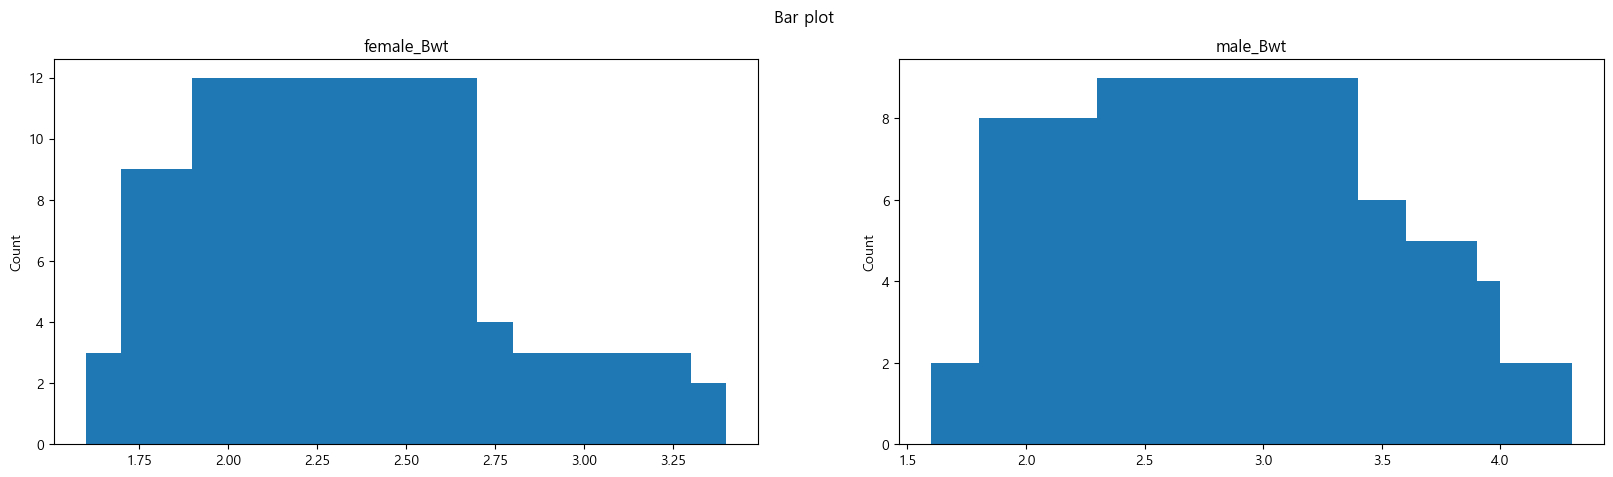

In [131]:
# 데이터 분포 확인

import matplotlib.pyplot as plt

female_Bwt_cnt = pd.value_counts(female.values, sort=False)
male_Bwt_cnt = pd.value_counts(male.values, sort=False)
fig, axs = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Bar plot')
width =0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')
plt.show()

In [33]:
# 정규성을 그냥 가정하고 검정을 건너뛰었던 예제2

In [34]:
# (1) 정규성 검정 수행

shapiro(F_cats)
shapiro(M_cats)

# 근데 female은 정규성이 없는 것으로 보임

ShapiroResult(statistic=0.890961229801178, pvalue=0.0003754270146600902)

ShapiroResult(statistic=0.9788323640823364, pvalue=0.1189616471529007)

In [32]:
# (2) 독립표본 t-test

from scipy.stats import ranksums, mannwhitneyu
ranksums(F_cats, M_cats) # 비정규성에서 사용하는 부호순위합 검정
mannwhitneyu(F_cats, M_cats)

# 뭐든 둘다 다르다

RanksumsResult(statistic=-6.484649068728496, pvalue=8.893855174450822e-11)

MannwhitneyuResult(statistic=757.5, pvalue=8.200502234321752e-11)